In [2]:
import matplotlib.pyplot as plt
import os
import pickle
from ipywidgets import interact

# Segmentation and Playbacks results (Seg_FP-Results)


The following, is a demo on how to read and visualize the segmentation, trajectory and playbacks results obtained using the InP method[1] and Loh method[2]. 

`PatientID_segmentation.pkl` contains the following dictionary keys :

- **mask**: A NumPy array containing the segmentation (1 for the foreground vocal fold, 0 for the background).
- **contours**: A NumPy array containing the segmentation contours (1 for the foreground vocal fold, 0 for the background).
- **contours_color**: A NumPy array containing the segmentation contours in color (left fold represented in blue, right fold represented in red) overlaid on the original video.
- **edges**: A dictionary containing the following keys:
  - **Ri**: Regression line that splits the left and right folds.
  - **left**: Points representing the left vocal fold.
  - **right**: Points representing the right vocal fold.
  - **Iv**: Ventral points.
  - **Id**: Dorsal points.
  


The `PatientID_traj.pkl` file contains a dictionary with the following keys:

- **VFL_dis**: Distance between the glottal axis and the left vocal fold.
- **VFR_dis**: Distance between the glottal axis and the right vocal fold.
- **VFL_Point**: Left intersection point between the glottal axis and a line perpendicular to the center of the glottal axis.
- **VFR_Point**: Right intersection point between the glottal axis and a line perpendicular to the center of the glottal axis.
- **glottal_center**: Center point of the glottal axis.
- **line**: Equation representing the glottal axis.


The `PatientID_play.pkl` file contains a dictionary with the following keys representing the playbacks:

- **lrpvg**: Gray representation of the phonovibrogram presented in [3].
- **lrpvgColor**: Color representation of the phonovibrogram presented in [3].
- **glpvg**: Gray representation of the glottovibrogram presented in [4].
- **glpvgColor**: Color representation of the glottovibrogram presented in [4].
- **dorsal**: Dorsal points of the vocal folds.
- **ventral**: Ventral points of the vocal folds.



### References
[1] Andrade-Miranda, G., & Godino-Llorente, J. I. (2017). Glottal gap tracking by a continuous background modeling using inpainting. Medical & Biological Engineering & Computing, 55, 2123-2141.
  
[2] Lohscheller, J., Toy, H., Rosanowski, F., Eysholdt, U., & Döllinger, M. (2007). Clinically evaluated procedure for the reconstruction of vocal fold vibrations from endoscopic digital high-speed videos. Medical image analysis, 11(4), 400-413.

[3] Lohscheller, J., Eysholdt, U., Toy, H., & Dollinger, M. (2008). Phonovibrography: mapping high-speed movies of vocal fold vibrations into 2-D diagrams for visualizing and analyzing the underlying laryngeal dynamics. IEEE transactions on medical imaging, 27(3), 300-309.

[4] Karakozoglou, S. Z., Henrich, N., d’Alessandro, C., & Stylianou, Y. (2012). Automatic glottal segmentation using local-based active contours and application to glottovibrography. Speech Communication, 54(5), 641-654.

### Load and display segmentation results 

In [3]:
####
main_folder='./GIRAFE/Seg_FP-Results/Automatic_Segmentation/InP_method'
PatientID='patient1'
####
with open(os.path.join(main_folder,PatientID,PatientID+'_segmentation.pkl'), 'rb') as pickle_file:
    segmentation=pickle.load(pickle_file)

#### Check the dictionary keys

In [4]:
print(segmentation.keys())

dict_keys(['mask', 'contours', 'contours_color', 'edges'])


In [5]:
#Display segmentation results
video=segmentation['mask']
#DISPLAY VIDEO
@interact
def showSegmentationAndVideoFrame(frame:(0, video.shape[-1]-1)):
    global n_frame
    n_frame=frame
    plt.figure(figsize=(12,12))
    plt.subplot(121)
    plt.imshow(video[:,:,n_frame],cmap='gray')
    plt.title("Video frame {}".format(n_frame))
    

interactive(children=(IntSlider(value=199, description='frame', max=399), Output()), _dom_classes=('widget-int…

In [5]:
video=segmentation['contours']
#DISPLAY VIDEO
@interact
def showSegmentationAndVideoFrame(frame:(0, video.shape[-1]-1)):
    global n_frame
    n_frame=frame
    plt.figure(figsize=(12,12))
    plt.subplot(121)
    plt.imshow(video[:,:,n_frame],cmap='gray')
    plt.title("Video frame {}".format(n_frame))

interactive(children=(IntSlider(value=199, description='frame', max=399), Output()), _dom_classes=('widget-int…

In [6]:
video=segmentation['contours_color']
#DISPLAY VIDEO
@interact
def showSegmentationAndVideoFrame(frame:(0, video.shape[-1]-1)):
    global n_frame
    n_frame=frame
    plt.figure(figsize=(12,12))
    plt.subplot(121)
    plt.imshow(video[:,:,:,n_frame],cmap='gray')
    plt.title("Video frame {}".format(n_frame))

interactive(children=(IntSlider(value=199, description='frame', max=399), Output()), _dom_classes=('widget-int…

### Load and display trajectories and playbacks results 

In [7]:
with open(os.path.join(main_folder,PatientID,PatientID+'_traj.pkl'), 'rb') as pickle_file:
    trajectory=pickle.load(pickle_file)

with open(os.path.join(main_folder,PatientID,PatientID+'_play.pkl'), 'rb') as pickle_file:
    playbacks=pickle.load(pickle_file)

### Vocal Fold Trajectories 

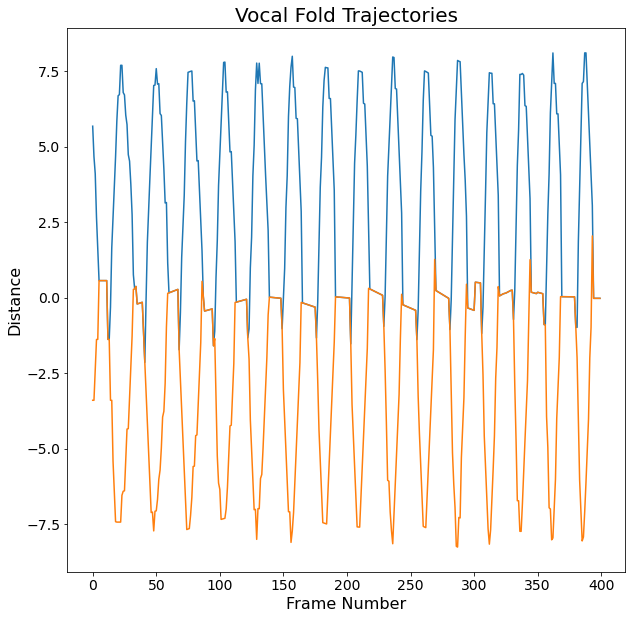

In [8]:
plt.figure(figsize=(10,10))
# Plotting the data
plt.plot(trajectory['VFL_dis'])
plt.plot(trajectory['VFR_dis'])

# Adding title and labels with increased font size
plt.title('Vocal Fold Trajectories', fontsize=20)
plt.xlabel('Frame Number', fontsize=16)
plt.ylabel('Distance', fontsize=16)

# Adjusting tick parameters for better readability
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Display the plot
plt.show()


### Vocal Folds Playbacks

Text(-30, 0, 'Normalized glottal area')

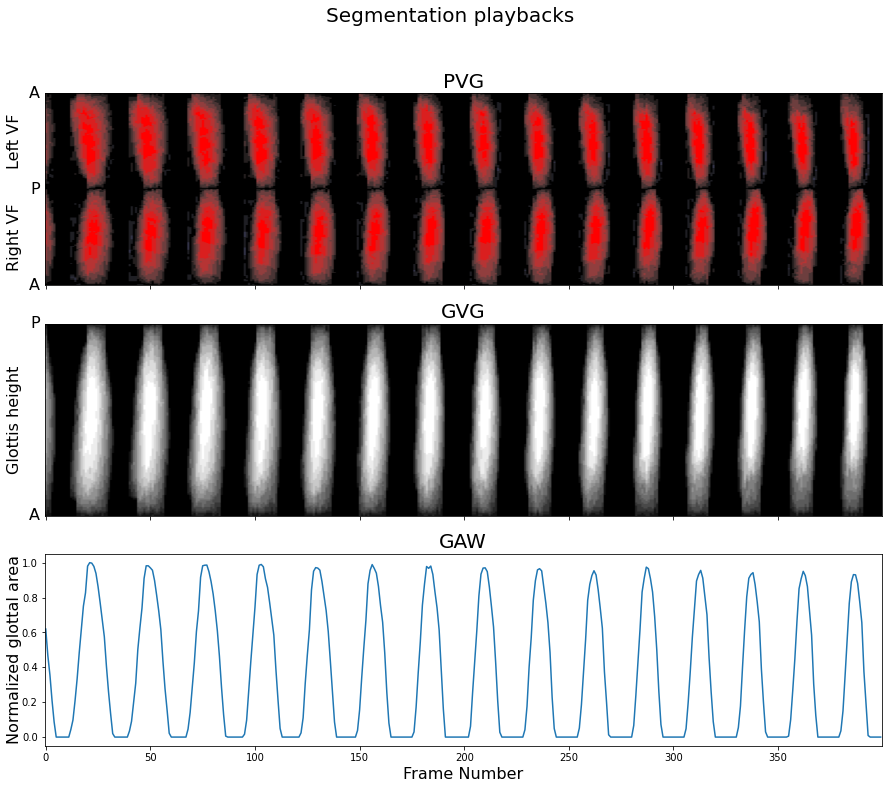

In [9]:
#compute GAW from GVG
GAW=sum(playbacks['glpvg']-min(sum(playbacks['glpvg'])))/(max(sum(playbacks['glpvg']))-min(sum(playbacks['glpvg'])))
fig, axs = plt.subplots(3, 1,sharex=True, sharey=False,figsize=(15,12))
fig.suptitle('Segmentation playbacks', fontsize=20)
plt.xlabel('Frame Number', fontsize=16)
axs[0].imshow(playbacks['lrpvgColor'],cmap='gray',aspect='auto')
axs[1].imshow(playbacks['glpvg'],cmap='gray',aspect='auto')
axs[2].plot(GAW)
axs[0].set_yticks([])
axs[1].set_yticks([])
# Add custom y-axis labels to axs[0]
axs[0].set_title('PVG',fontsize=20)
axs[0].annotate('A', xy=(0, 1), xycoords='axes fraction', xytext=(-10, 0), 
                textcoords='offset points', ha='center', va='center', fontsize=16)
axs[0].annotate('Left VF', xy=(0, 0.75), xycoords='axes fraction', xytext=(-30, 0), 
                textcoords='offset points', ha='center', va='center', fontsize=16, rotation=90)
axs[0].annotate('P', xy=(0, 0.5), xycoords='axes fraction', xytext=(-10, 0), 
                textcoords='offset points', ha='center', va='center', fontsize=16)
axs[0].annotate('Right VF', xy=(0, 0.25), xycoords='axes fraction', xytext=(-30, 0), 
                textcoords='offset points', ha='center', va='center', fontsize=16, rotation=90)
axs[0].annotate('A', xy=(0, 0), xycoords='axes fraction', xytext=(-10, 0), 
                textcoords='offset points', ha='center', va='center', fontsize=16)


# Add custom y-axis labels to axs[1]
axs[1].set_title('GVG',fontsize=20)
axs[1].annotate('P', xy=(0, 1), xycoords='axes fraction', xytext=(-10, 0), 
                textcoords='offset points', ha='center', va='center', fontsize=16)
axs[1].annotate('Glottis height', xy=(0, 0.5), xycoords='axes fraction', xytext=(-30, 0), 
                textcoords='offset points', ha='center', va='center', fontsize=16, rotation=90)
axs[1].annotate('A', xy=(0, 0), xycoords='axes fraction', xytext=(-10, 0), 
                textcoords='offset points', ha='center', va='center', fontsize=16)

# Add custom y-axis labels to axs[2]
axs[2].set_title('GAW',fontsize=20)
axs[2].annotate('Normalized glottal area', xy=(0, 0.5), xycoords='axes fraction', xytext=(-30, 0), 
                textcoords='offset points', ha='center', va='center', fontsize=16, rotation=90)

### Load and display manual segmentation (summary)  

In [10]:
####
main_folder='./GIRAFE/Seg_FP-Results/Manual_segmentation/summary'
####
with open(os.path.join(main_folder,'data.pkl'), 'rb') as pickle_file:
    segmentation=pickle.load(pickle_file)

In [11]:
video=segmentation['original']
#DISPLAY VIDEO
@interact
def showSegmentationAndVideoFrame(frame:(0, video.shape[-1]-1)):
    global n_frame
    n_frame=frame
    plt.figure(figsize=(12,12))
    plt.subplot(121)
    plt.imshow(video[:,:,:,n_frame],cmap='gray')
    plt.title("Video frame {}".format(n_frame))

interactive(children=(IntSlider(value=379, description='frame', max=759), Output()), _dom_classes=('widget-int…

In [12]:
video=segmentation['binary_mask']
#DISPLAY VIDEO
@interact
def showSegmentationAndVideoFrame(frame:(0, video.shape[-1]-1)):
    global n_frame
    n_frame=frame
    plt.figure(figsize=(12,12))
    plt.subplot(121)
    plt.imshow(video[:,:,n_frame],cmap='gray')
    plt.title("Video frame {}".format(n_frame))

interactive(children=(IntSlider(value=379, description='frame', max=759), Output()), _dom_classes=('widget-int…

In [13]:
video=segmentation['color_mask']
#DISPLAY VIDEO
@interact
def showSegmentationAndVideoFrame(frame:(0, video.shape[-1]-1)):
    global n_frame
    n_frame=frame
    plt.figure(figsize=(12,12))
    plt.subplot(121)
    plt.imshow(video[:,:,:,n_frame],cmap='gray')
    plt.title("Video frame {}".format(n_frame))

interactive(children=(IntSlider(value=379, description='frame', max=759), Output()), _dom_classes=('widget-int…

### Load manual segmentation per video (one glottal cycle)

In [14]:
####
main_folder='./GIRAFE/Seg_FP-Results/Manual_segmentation'
PatientID='patient13'
####
with open(os.path.join(main_folder,PatientID,PatientID+'_segmentation.pkl'), 'rb') as pickle_file:
    segmentation=pickle.load(pickle_file)
with open(os.path.join(main_folder,PatientID,PatientID+'_play.pkl'), 'rb') as pickle_file:
    playbacks=pickle.load(pickle_file)

In [15]:
video=segmentation['original']
#DISPLAY VIDEO
@interact
def showSegmentationAndVideoFrame(frame:(0, video.shape[-1]-1)):
    global n_frame
    n_frame=frame
    plt.figure(figsize=(12,12))
    plt.subplot(121)
    plt.imshow(video[:,:,:,n_frame],cmap='gray')
    plt.title("Video frame {}".format(n_frame))

interactive(children=(IntSlider(value=9, description='frame', max=19), Output()), _dom_classes=('widget-intera…

In [16]:
video=segmentation['mask']
#DISPLAY VIDEO
@interact
def showSegmentationAndVideoFrame(frame:(0, video.shape[-1]-1)):
    global n_frame
    n_frame=frame
    plt.figure(figsize=(12,12))
    plt.subplot(121)
    plt.imshow(video[:,:,n_frame],cmap='gray')
    plt.title("Video frame {}".format(n_frame))

interactive(children=(IntSlider(value=9, description='frame', max=19), Output()), _dom_classes=('widget-intera…

Text(-30, 0, 'Normalized glottal area')

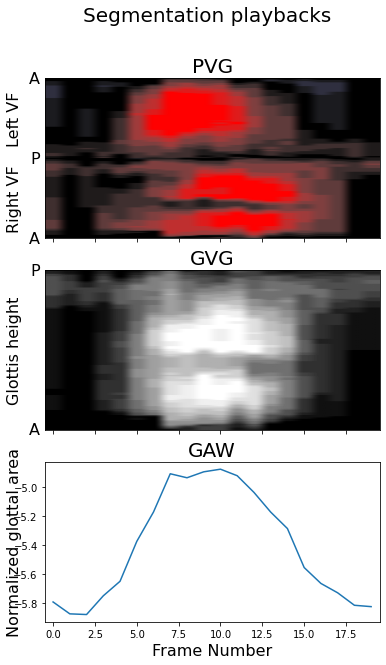

In [17]:
#compute GAW from GVG
GAW=sum(playbacks['glpvg']-min(sum(playbacks['glpvg'])))/(max(sum(playbacks['glpvg']))-min(sum(playbacks['glpvg'])))
fig, axs = plt.subplots(3, 1,sharex=True, sharey=False,figsize=(6,10))
fig.suptitle('Segmentation playbacks', fontsize=20)
plt.xlabel('Frame Number', fontsize=16)
axs[0].imshow(playbacks['lrpvgColor'],cmap='gray',aspect='auto')
axs[1].imshow(playbacks['glpvg'],cmap='gray',aspect='auto')
axs[2].plot(GAW)
axs[0].set_yticks([])
axs[1].set_yticks([])
# Add custom y-axis labels to axs[0]
axs[0].set_title('PVG',fontsize=20)
axs[0].annotate('A', xy=(0, 1), xycoords='axes fraction', xytext=(-10, 0), 
                textcoords='offset points', ha='center', va='center', fontsize=16)
axs[0].annotate('Left VF', xy=(0, 0.75), xycoords='axes fraction', xytext=(-30, 0), 
                textcoords='offset points', ha='center', va='center', fontsize=16, rotation=90)
axs[0].annotate('P', xy=(0, 0.5), xycoords='axes fraction', xytext=(-10, 0), 
                textcoords='offset points', ha='center', va='center', fontsize=16)
axs[0].annotate('Right VF', xy=(0, 0.25), xycoords='axes fraction', xytext=(-30, 0), 
                textcoords='offset points', ha='center', va='center', fontsize=16, rotation=90)
axs[0].annotate('A', xy=(0, 0), xycoords='axes fraction', xytext=(-10, 0), 
                textcoords='offset points', ha='center', va='center', fontsize=16)


# Add custom y-axis labels to axs[1]
axs[1].set_title('GVG',fontsize=20)
axs[1].annotate('P', xy=(0, 1), xycoords='axes fraction', xytext=(-10, 0), 
                textcoords='offset points', ha='center', va='center', fontsize=16)
axs[1].annotate('Glottis height', xy=(0, 0.5), xycoords='axes fraction', xytext=(-30, 0), 
                textcoords='offset points', ha='center', va='center', fontsize=16, rotation=90)
axs[1].annotate('A', xy=(0, 0), xycoords='axes fraction', xytext=(-10, 0), 
                textcoords='offset points', ha='center', va='center', fontsize=16)

# Add custom y-axis labels to axs[2]
axs[2].set_title('GAW',fontsize=20)
axs[2].annotate('Normalized glottal area', xy=(0, 0.5), xycoords='axes fraction', xytext=(-30, 0), 
                textcoords='offset points', ha='center', va='center', fontsize=16, rotation=90)